In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import cv2
import shutil as sh
import random as r
import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers


src="/kaggle/input/flowers-recognition/flowers"

b_Size=32
Img_H=180
Img_W=180

Train_Flower=tf.keras.preprocessing.image_dataset_from_directory(src,validation_split=0.2,
                                                                subset='training',
                                                                seed=123,image_size=(Img_H,Img_W),batch_size=b_Size)

Validate_Flower=tf.keras.preprocessing.image_dataset_from_directory(src,validation_split=0.2,
                                                                subset='validation',
                                                                seed=123,image_size=(Img_H,Img_W),batch_size=b_Size)


cls_Name=Train_Flower.class_names
print(cls_Name)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


2023-02-04 10:16:21.837459: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


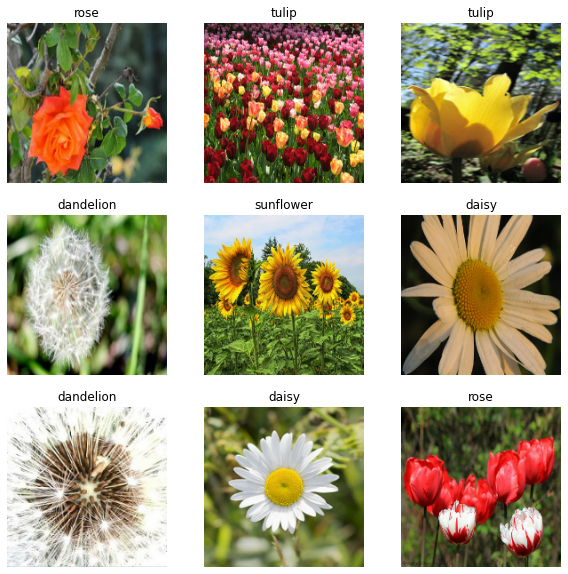

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for imgs, labels in Train_Flower.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.title(cls_Name[labels[i]])
        plt.axis("off")